<a href="https://colab.research.google.com/github/Anderson-Andre-P/Uber-Data-Analysis/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=754e4258d26a8823d32de77710cad4d720b753baaaf7c36549f31e0db8002ac1
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=660d81700c2e6888097b6b24bdc46cdfe2768e3f116955acc3c834824ddd9f08
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [2]:
import umap

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import make_regression
from sklearn.datasets import load_digits

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from google.colab import files

In [3]:
pd.set_option('display.max_columns', None)

In [7]:
uploaded = files.upload()

Saving uber.xlsx to uber.xlsx


In [8]:
uri = "/content/uber.xlsx"

In [9]:
df = pd.read_excel(uri)
df.head()

,Data da solicitação (local),Hora da solicitação (local),Serviço,Distância (mi),Duração (min),Grupo,Valor da transação em BRL (com tributos)
0,2020-01-18,01:33:00,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,11:19:00,Travel | UberX,2.25,12,--,8.79
2,2020-02-12,17:42:00,Travel | VIP,4.19,29,--,12.09
3,2020-02-13,04:49:00,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,07:57:00,Travel | Comfort,22.72,46,Geral,74.95


In [10]:
df.shape

(43642, 7)

In [11]:
df.isna().sum()

Data da solicitação (local)                 0
Hora da solicitação (local)                 0
Serviço                                     0
Distância (mi)                              0
Duração (min)                               0
Grupo                                       0
Valor da transação em BRL (com tributos)    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data da solicitação (local)               43642 non-null  datetime64[ns]
 1   Hora da solicitação (local)               43642 non-null  object        
 2   Serviço                                   43642 non-null  object        
 3   Distância (mi)                            43642 non-null  object        
 4   Duração (min)                             43642 non-null  object        
 5   Grupo                                     43642 non-null  object        
 6   Valor da transação em BRL (com tributos)  43642 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.3+ MB


In [13]:
df.describe()

,Valor da transação em BRL (com tributos)
count,43642.000000
mean,33.316943
std,30.611027
min,1.490000
25%,14.970000
50%,24.900000
75%,40.530000
max,573.810000


In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43637    False
43638    False
43639    False
43640    False
43641    False
Length: 43642, dtype: bool

In [15]:
corr = df.corr()

In [16]:
df.rename(columns = {'Data da solicitação (local)': 'data_solicitacao',
                    'Hora da solicitação (local)': 'hora_solicitacao', 'Serviço': 'categoria',
                    'Distância (mi)': 'distancia', 'Duração (min)': 'duracao', 'Grupo': 'grupo', 
                    'Valor da transação em BRL (com tributos)': 'preco'}, inplace = True)
df.head()

,data_solicitacao,hora_solicitacao,categoria,distancia,duracao,grupo,preco
0,2020-01-18,01:33:00,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,11:19:00,Travel | UberX,2.25,12,--,8.79
2,2020-02-12,17:42:00,Travel | VIP,4.19,29,--,12.09
3,2020-02-13,04:49:00,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,07:57:00,Travel | Comfort,22.72,46,Geral,74.95


In [17]:
df.shape

(43642, 7)

In [18]:
df.isna().sum()

data_solicitacao    0
hora_solicitacao    0
categoria           0
distancia           0
duracao             0
grupo               0
preco               0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_solicitacao  43642 non-null  datetime64[ns]
 1   hora_solicitacao  43642 non-null  object        
 2   categoria         43642 non-null  object        
 3   distancia         43642 non-null  object        
 4   duracao           43642 non-null  object        
 5   grupo             43642 non-null  object        
 6   preco             43642 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.3+ MB


In [20]:
# df['distancia'] = df['distancia'].astype(float)

In [21]:
print(df[df['distancia'] == "--"].shape[0]*100/df.shape[0],'%')

1.3633655652811512 %


In [22]:
df.drop(df[df['distancia'] == "--"].index, inplace = True)

In [23]:
df.shape

(43047, 7)

In [24]:
df['distancia'] = df['distancia'].astype(float)

In [25]:
df['duracao'] = df['duracao'].astype(int)

In [26]:
print(df[(df['grupo'] != 'Geral') & (df['grupo'] != 'Diretores')].shape[0]*100/df.shape[0],'%')

18.600599344902083 %


In [27]:
df['grupo'] = df['grupo'].replace('--', 'Geral')

In [28]:
df.drop(columns = 'hora_solicitacao', inplace = True)

In [29]:
df.head()

,data_solicitacao,categoria,distancia,duracao,grupo,preco
0,2020-01-18,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,Travel | UberX,2.25,12,Geral,8.79
2,2020-02-12,Travel | VIP,4.19,29,Geral,12.09
3,2020-02-13,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,Travel | Comfort,22.72,46,Geral,74.95


In [30]:
df['dia_semana'] = df['data_solicitacao'].dt.day_name()
df.head()

,data_solicitacao,categoria,distancia,duracao,grupo,preco,dia_semana
0,2020-01-18,Travel | UberX,10.18,21,Diretores,29.38,Saturday
1,2020-01-18,Travel | UberX,2.25,12,Geral,8.79,Saturday
2,2020-02-12,Travel | VIP,4.19,29,Geral,12.09,Wednesday
3,2020-02-13,Travel | UberX,12.41,29,Geral,28.46,Thursday
4,2020-02-13,Travel | Comfort,22.72,46,Geral,74.95,Thursday


In [31]:
df.drop(columns = 'data_solicitacao', inplace = True)
df.head()

,categoria,distancia,duracao,grupo,preco,dia_semana
0,Travel | UberX,10.18,21,Diretores,29.38,Saturday
1,Travel | UberX,2.25,12,Geral,8.79,Saturday
2,Travel | VIP,4.19,29,Geral,12.09,Wednesday
3,Travel | UberX,12.41,29,Geral,28.46,Thursday
4,Travel | Comfort,22.72,46,Geral,74.95,Thursday


In [32]:
df['ticket_medio'] = df['preco'] / df['distancia']
df.head()

,categoria,distancia,duracao,grupo,preco,dia_semana,ticket_medio
0,Travel | UberX,10.18,21,Diretores,29.38,Saturday,2.886051
1,Travel | UberX,2.25,12,Geral,8.79,Saturday,3.906667
2,Travel | VIP,4.19,29,Geral,12.09,Wednesday,2.885442
3,Travel | UberX,12.41,29,Geral,28.46,Thursday,2.293312
4,Travel | Comfort,22.72,46,Geral,74.95,Thursday,3.298856


In [33]:
df.describe()

,distancia,duracao,preco,ticket_medio
count,43047.000000,43047.000000,43047.000000,4.304700e+04
mean,9.244175,26.328385,33.714128,inf
std,8.813901,20.490758,30.632266,NaN
min,0.000000,0.000000,3.950000,5.571587e-01
25%,3.300000,13.000000,15.230000,2.901199e+00
50%,6.910000,21.000000,24.920000,3.776786e+00
75%,12.100000,34.000000,41.030000,5.404336e+00
max,136.550000,447.000000,573.810000,inf


In [34]:
df[df['distancia'] == 0]

,categoria,distancia,duracao,grupo,preco,dia_semana,ticket_medio
893,Travel | UberX,0.0,0,Geral,9.00,Thursday,inf
894,Travel | UberX,0.0,0,Geral,9.00,Thursday,inf
2334,Travel | UberX,0.0,1,Geral,9.32,Thursday,inf
2535,Travel | UberX,0.0,5,Geral,5.35,Thursday,inf
3853,Travel | UberX,0.0,0,Geral,7.36,Friday,inf
11471,Travel | UberX,0.0,0,Geral,22.77,Monday,inf
34792,Travel | UberX,0.0,3,Geral,24.93,Thursday,inf
37136,Travel | Comfort,0.0,0,Geral,10.74,Monday,inf
37231,Travel | UberX,0.0,36,Geral,19.15,Tuesday,inf
37295,Travel | UberX,0.0,36,Geral,28.84,Tuesday,inf


In [35]:
df.drop(df[df['distancia'] == 0].index, inplace = True)

In [36]:
df.drop(columns = ['distancia', 'preco'], inplace = True)
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio
0,Travel | UberX,21,Diretores,Saturday,2.886051
1,Travel | UberX,12,Geral,Saturday,3.906667
2,Travel | VIP,29,Geral,Wednesday,2.885442
3,Travel | UberX,29,Geral,Thursday,2.293312
4,Travel | Comfort,46,Geral,Thursday,3.298856


In [37]:
df.shape

(43036, 5)

In [38]:
cols_num = ['duracao', 'ticket_medio']

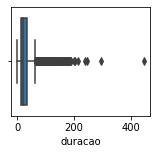

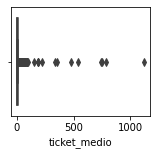

In [39]:
for i in cols_num:
    plt.figure(figsize = (2.5,2))
    sns.boxplot(x = df[i])
    plt.show()

In [40]:
cols_cat = ['categoria', 'grupo', 'dia_semana']

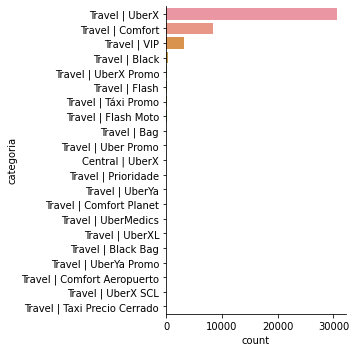

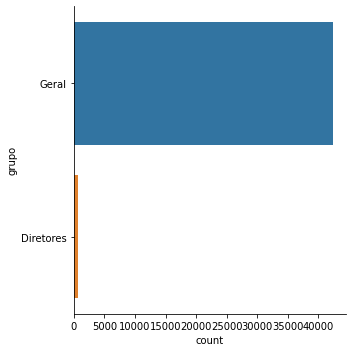

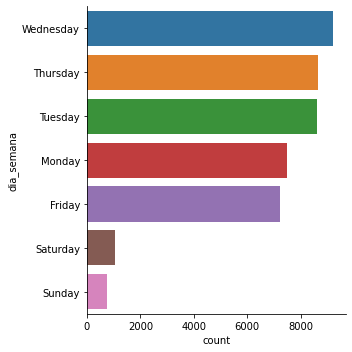

In [41]:
for i in cols_cat:
    fig = sns.catplot(data = df, y = i, kind = 'count', order = df[i].value_counts().index)
    ax = fig.facet_axis(0,0)
    for i in ax.containers:
        labels = [v.get_width() for v in i]

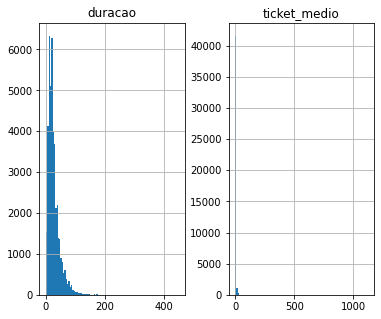

In [42]:
df.hist(bins=100, figsize=(6,5))
plt.show()

In [43]:
df['categoria'] = df['categoria'].replace(['Travel | UberX', 'Travel | VIP', 'Travel | Comfort',
                                            'Travel | UberMedics', 'Travel | Uber Promo', 'Travel | Bag',
                                            'Travel | Black', 'Travel | UberX Promo', 'Central | UberX',
                                            'Travel | Flash', 'Travel | Táxi Promo', 'Travel | Flash Moto',
                                            'Travel | Black Bag', 'Travel | Prioridade',
                                            'Travel | Comfort Planet', 'Travel | UberYa Promo',
                                            'Travel | UberYa', 'Travel | UberXL', 'Travel | Comfort Aeropuerto',
                                            'Travel | UberX SCL', 'Travel | Taxi Precio Cerrado'],
                                            ['x', 'x', 'comfort', 'outros', 'outros', 'outros', 'black', 'x',
                                            'x', 'flash', 'outros', 'flash', 'black', 'outros', 'comfort',
                                            'outros', 'outros', 'outros', 'outros', 'x', 'outros'])

In [44]:
# ax = plt.subplots()

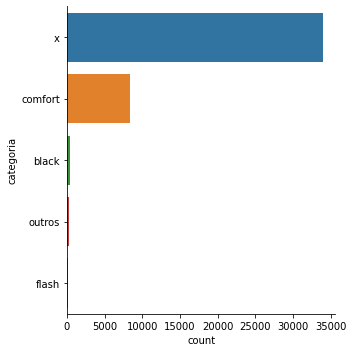

In [45]:
fig = sns.catplot(data = df, y = 'categoria', kind = 'count', order = df['categoria'].value_counts().index)
ax = fig.facet_axis(0,0)
for i in ax.containers:
    labels = [v.get_width() for v in i]
plt.show()

In [46]:
df_classe_x = df[df['categoria'] == 'x'].sample(2000)
df_classe_comfort = df[df['categoria'] == 'comfort'].sample(500)
df_classe_black = df[df['categoria'] == 'black']
df_classe_outros = df[df['categoria'] == 'outros']
df_classe_flash = df[df['categoria'] == 'flash']
df = pd.concat([df_classe_x, df_classe_comfort, df_classe_black, df_classe_outros, df_classe_flash])

In [47]:
df.shape

(3253, 5)

In [48]:
df_grupo = pd.DataFrame(OneHotEncoder().fit_transform(df[['grupo']]).toarray())
df_grupo.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [49]:
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio
40566,x,26,Geral,Monday,2.954142
25970,x,21,Geral,Wednesday,3.624319
15858,x,20,Geral,Thursday,5.198697
24532,x,41,Geral,Friday,5.784657
19495,x,20,Geral,Thursday,2.283262


In [50]:
df = pd.concat([df.reset_index(), df_grupo], axis = 1)
df.drop(columns = ['index'], inplace = True)
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio,0,1
0,x,26,Geral,Monday,2.954142,0.0,1.0
1,x,21,Geral,Wednesday,3.624319,0.0,1.0
2,x,20,Geral,Thursday,5.198697,0.0,1.0
3,x,41,Geral,Friday,5.784657,0.0,1.0
4,x,20,Geral,Thursday,2.283262,0.0,1.0


In [51]:
df.drop(columns = ['grupo', 1], inplace = True)
df.rename(columns = {0: 'diretores'}, inplace = True)
df.head()

,categoria,duracao,dia_semana,ticket_medio,diretores
0,x,26,Monday,2.954142,0.0
1,x,21,Wednesday,3.624319,0.0
2,x,20,Thursday,5.198697,0.0
3,x,41,Friday,5.784657,0.0
4,x,20,Thursday,2.283262,0.0


In [52]:
df = pd.get_dummies(df, columns = ['dia_semana'], prefix = '', prefix_sep = '')
df.head()

,categoria,duracao,ticket_medio,diretores,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,x,26,2.954142,0.0,0,1,0,0,0,0,0
1,x,21,3.624319,0.0,0,0,0,0,0,0,1
2,x,20,5.198697,0.0,0,0,0,0,1,0,0
3,x,41,5.784657,0.0,1,0,0,0,0,0,0
4,x,20,2.283262,0.0,0,0,0,0,1,0,0


In [53]:
x = df.iloc[:, 0:-1]
y = df["ticket_medio"]

In [54]:
le = preprocessing.LabelEncoder()
x['categoria']  = le.fit_transform(x['categoria'])
x['duracao']  = le.fit_transform(x['duracao'])
x['diretores']  = le.fit_transform(x['diretores'])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [56]:
print(X_train.shape)

(2439, 10)


In [57]:
print(X_test.shape)

(814, 10)


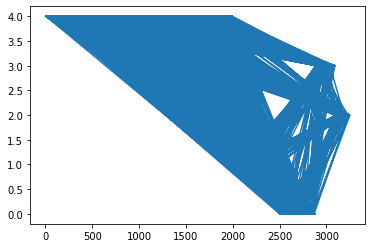

In [58]:
plt.plot(X_train.iloc[:, 0])
plt.show()

In [59]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

In [60]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

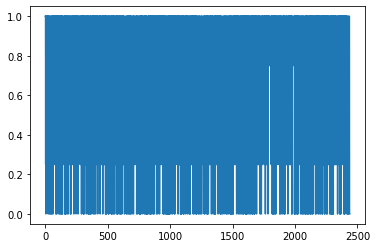

In [61]:
plt.plot(X_train[:, 0])
plt.show()

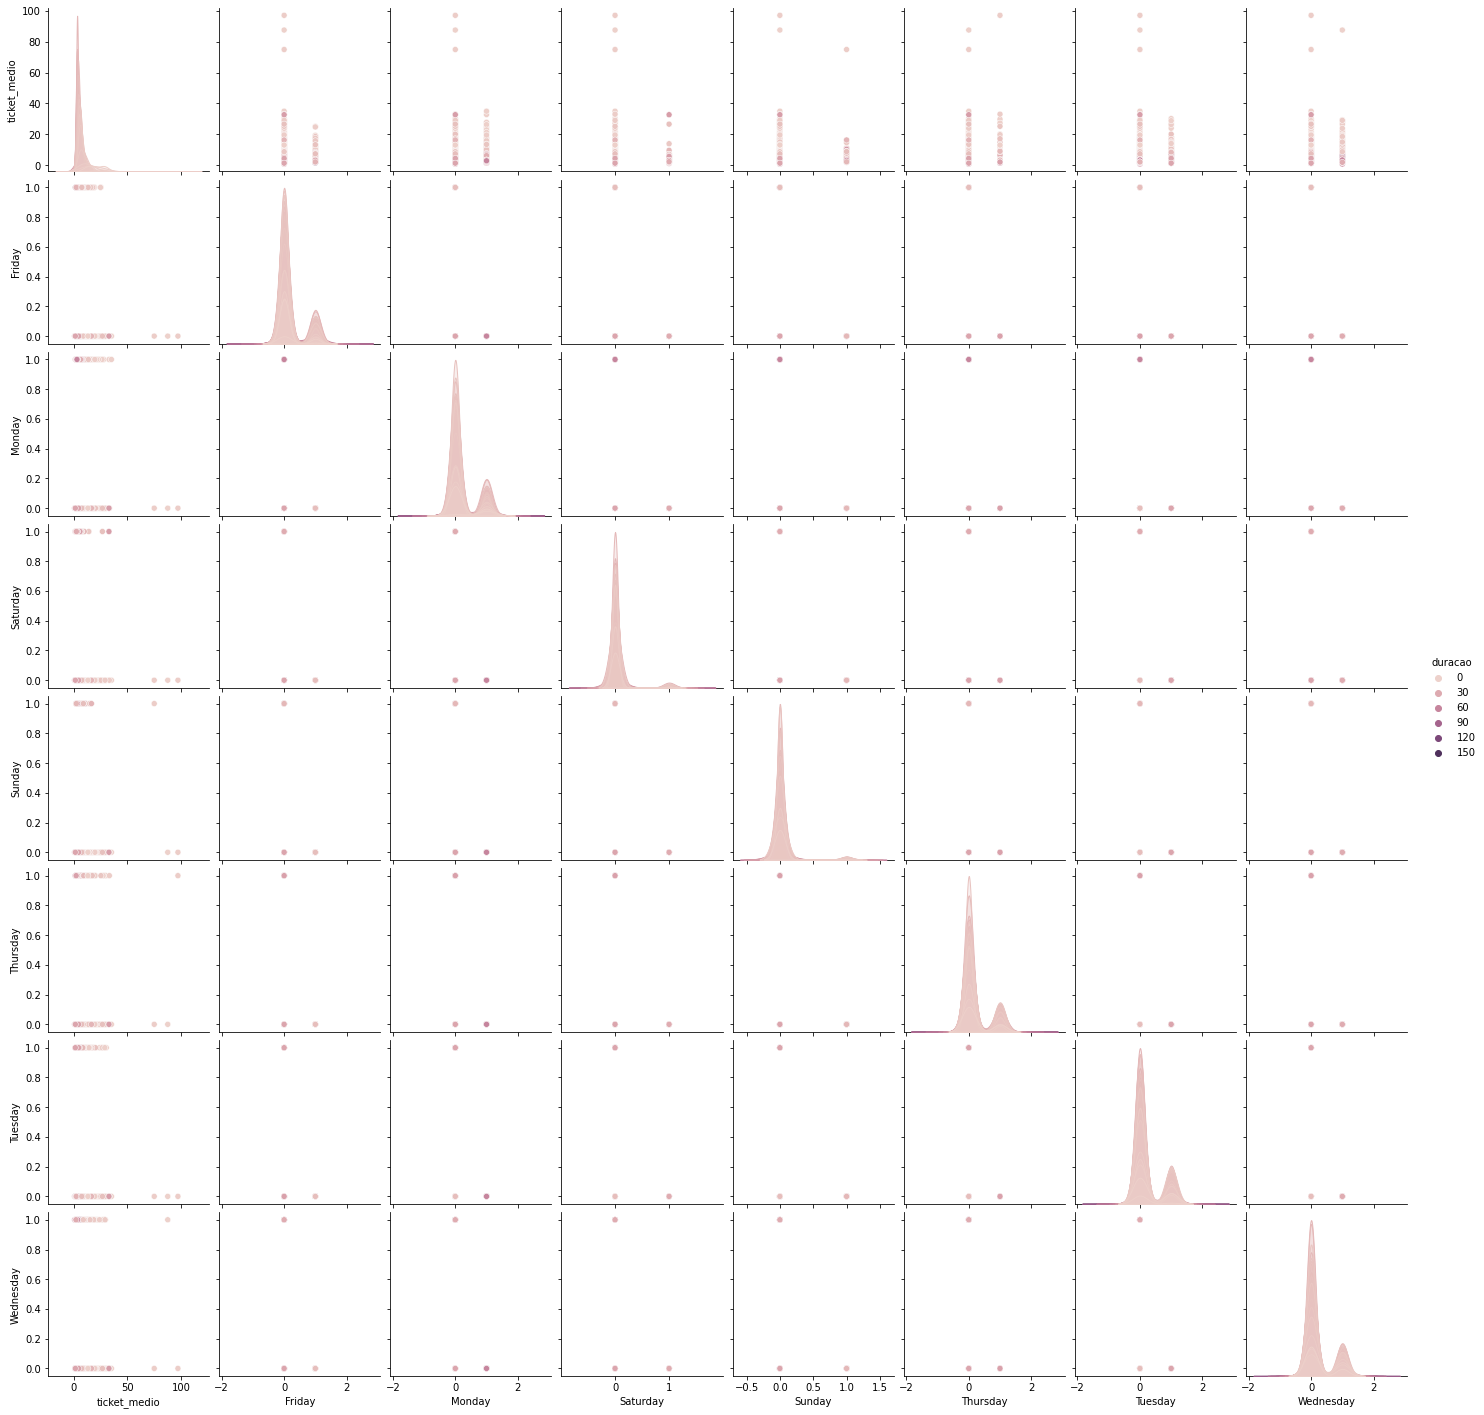

In [62]:
sns.pairplot(df.drop("diretores", axis=1), hue='duracao');

In [63]:
reducer = umap.UMAP()

In [64]:
df_data_uber = df[
    [
        "duracao",
        "diretores",
        "Monday",
        "Tuesday", 
        "Wednesday", 
        "Thursday", 
        "Friday", 
        "Saturday", 
        "Sunday",
    ]
].values
scaled_df_data_uber = StandardScaler().fit_transform(df_data_uber)

In [65]:
embedding = reducer.fit_transform(scaled_df_data_uber)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   categoria     3253 non-null   object 
 1   duracao       3253 non-null   int64  
 2   ticket_medio  3253 non-null   float64
 3   diretores     3253 non-null   float64
 4   Friday        3253 non-null   uint8  
 5   Monday        3253 non-null   uint8  
 6   Saturday      3253 non-null   uint8  
 7   Sunday        3253 non-null   uint8  
 8   Thursday      3253 non-null   uint8  
 9   Tuesday       3253 non-null   uint8  
 10  Wednesday     3253 non-null   uint8  
dtypes: float64(2), int64(1), object(1), uint8(7)
memory usage: 124.0+ KB


In [120]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.Monday.map({"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6})])

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Uber dataset', fontsize=24);

TypeError: ignored

In [68]:
df.head()

,categoria,duracao,ticket_medio,diretores,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,x,26,2.954142,0.0,0,1,0,0,0,0,0
1,x,21,3.624319,0.0,0,0,0,0,0,0,1
2,x,20,5.198697,0.0,0,0,0,0,1,0,0
3,x,41,5.784657,0.0,1,0,0,0,0,0,0
4,x,20,2.283262,0.0,0,0,0,0,1,0,0


In [69]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

In [70]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

print(regr.predict(X_test))

[ 3.43954371  3.43954371  3.43954371  3.43954371  7.08447928  3.43954371
  6.73591624  7.08447928  6.69668923  3.43954371  3.43954371  6.73591624
  3.43954371  3.43954371  3.43954371  7.08447928  3.43954371  6.90375577
  3.43954371  3.43954371  3.43954371  3.43954371  3.43954371  3.43954371
  6.73591624  7.08447928  3.43954371 15.71841148  3.43954371  3.43954371
  3.43954371 16.09861519  3.43954371  3.43954371  3.43954371  3.43954371
  3.60463146  6.73591624  3.43954371  3.43954371  3.43954371  7.03705222
  7.08447928  7.08447928  3.43954371  6.90375577 12.13217212  7.08447928
  3.43954371  3.43954371  3.43954371  3.43954371  7.08447928  3.43954371
  3.43954371  3.43954371  3.43954371  6.90375577  3.43954371  3.43954371
  4.74484904  3.43954371  3.43954371  7.08447928  4.49741186  3.43954371
  3.43954371  6.99227332  7.08447928  9.25804514  3.43954371  7.08447928
  7.08447928  7.08447928  3.43954371  3.43954371  3.43954371  3.43954371
  3.43954371  3.43954371  4.56810564  9.25804514  3

In [71]:
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)

print("R2 teste: ", r2_score(y_pred_test, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred_test, y_test))

R2 teste:  0.14345626812698986
mean absolute error:  0.9587182752004559


In [72]:
raw_df = pd.read_excel(uri, skiprows=22)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]